In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from scipy import stats

In [6]:
df = pd.read_csv("exams.csv")

Initial Data:
   gender race/ethnicity parental level of education         lunch  \
0  female        group D                some college      standard   
1    male        group D          associate's degree      standard   
2  female        group D                some college  free/reduced   
3    male        group B                some college  free/reduced   
4  female        group D          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          59             70             78  
1                    none          96             93             87  
2                    none          57             76             77  
3                    none          70             70             63  
4                    none          83             85             86  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          

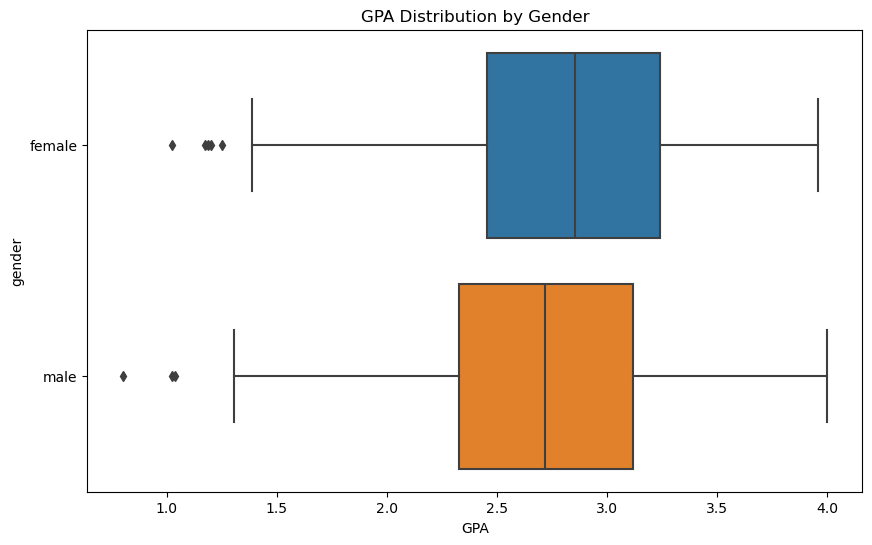

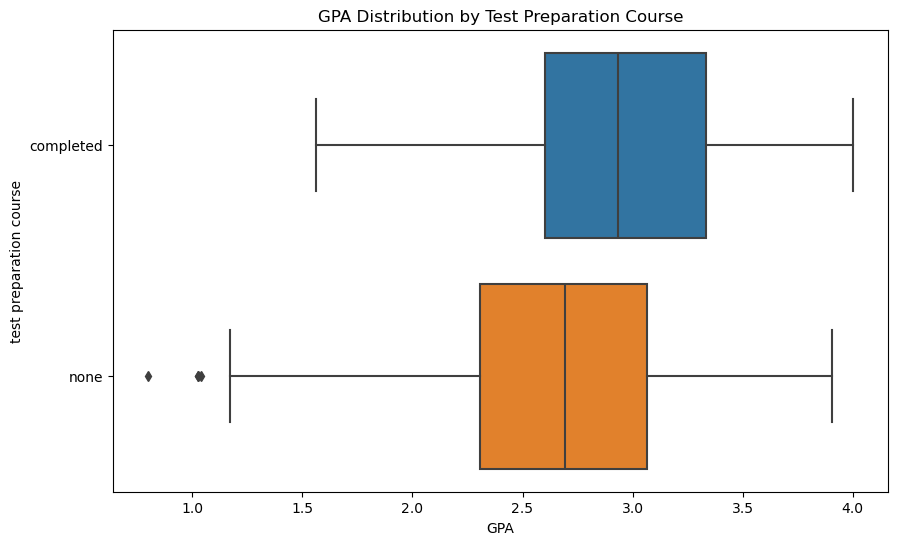

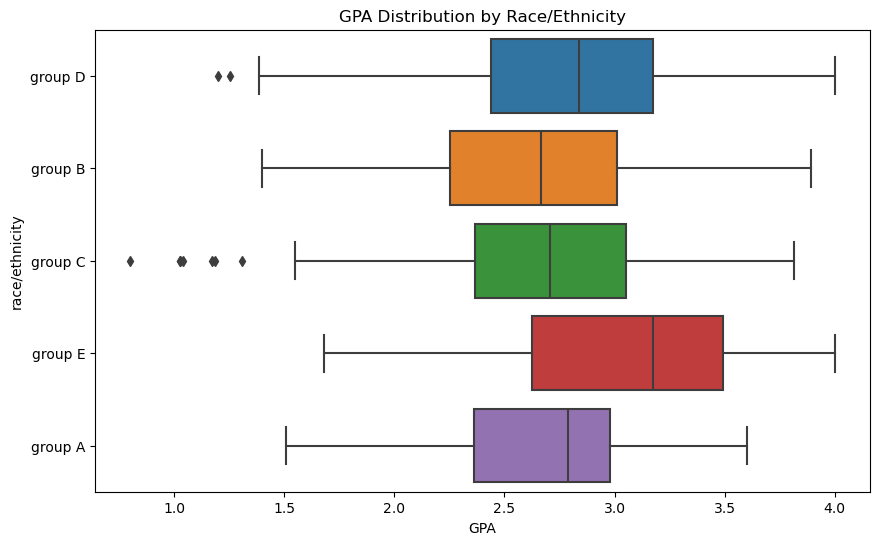

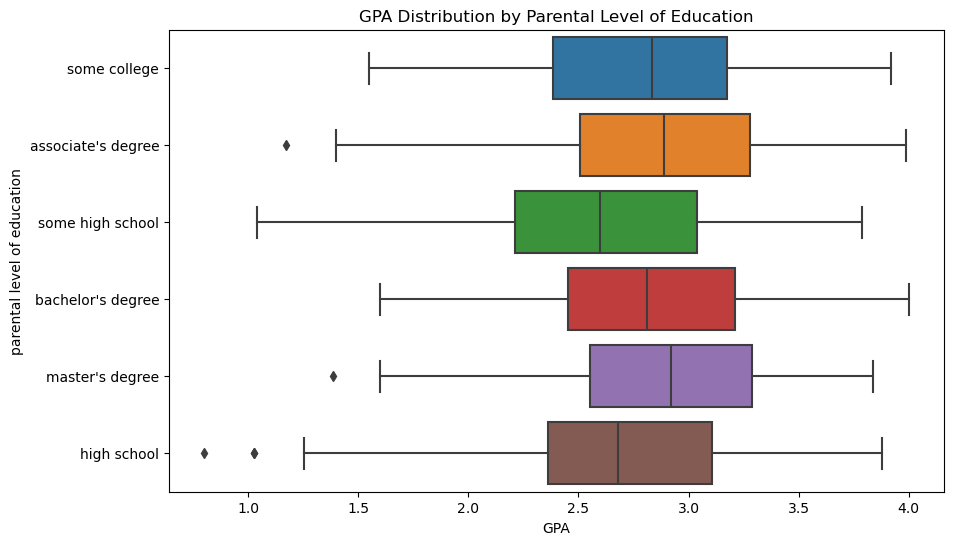

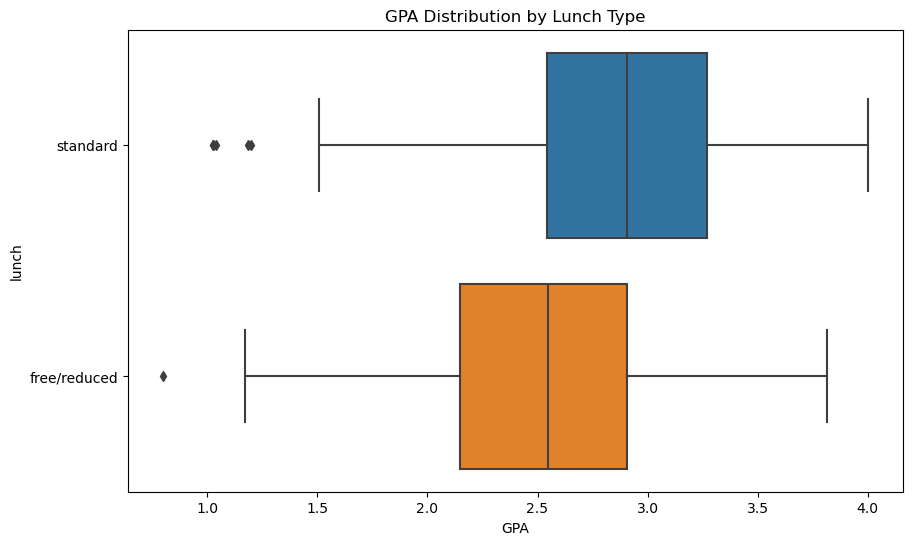

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
df = pd.read_csv("exams.csv")
# Display initial data
print("Initial Data:")
print(df.head())
print("\nData Information:")
print(df.info())

# Calculate GPA from test scores
# Assuming test score columns are named 'math score', 'reading score', and 'writing score'
test_score_columns = ['math score', 'reading score', 'writing score']

# Calculate the GPA (assuming scores are out of 100)
df['GPA'] = df[test_score_columns].mean(axis=1) / 25





# Descriptive Statistics
print("\nDescriptive Statistics of GPA:")
print(df['GPA'].describe())

# Visualizations

# Boxplot of GPA by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='GPA', y='gender', data=df)
plt.title('GPA Distribution by Gender')
plt.show()

# Boxplot of GPA by test preparation course
plt.figure(figsize=(10, 6))
sns.boxplot(x='GPA', y='test preparation course', data=df)
plt.title('GPA Distribution by Test Preparation Course')
plt.show()

# Boxplot of GPA by race/ethnicity
plt.figure(figsize=(10, 6))
sns.boxplot(x='GPA', y='race/ethnicity', data=df)
plt.title('GPA Distribution by Race/Ethnicity')
plt.show()

# Boxplot of GPA by parental level of education
plt.figure(figsize=(10, 6))
sns.boxplot(x='GPA', y='parental level of education', data=df)
plt.title('GPA Distribution by Parental Level of Education')
plt.show()

# Boxplot of GPA by lunch type
plt.figure(figsize=(10, 6))
sns.boxplot(x='GPA', y='lunch', data=df)
plt.title('GPA Distribution by Lunch Type')
plt.show()

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
# Function to perform z-test
def z_test(sample1, sample2):
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)
    n1, n2 = len(sample1), len(sample2)
    pooled_se = np.sqrt((std1**2 / n1) + (std2**2 / n2))
    z_stat = (mean1 - mean2) / pooled_se
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    return z_stat, p_value
# Hypothesis Testing
# Example: Do students with and without test preparation course have different average GPAs?
test_preparation_course_gpa = df[df['test preparation course'] == 'completed']['GPA']
no_test_preparation_course_gpa = df[df['test preparation course'] == 'none']['GPA']

z_stat, p_value = z_test(test_preparation_course_gpa, no_test_preparation_course_gpa)
print(f'Z-statistic for test preparation course: {z_stat}, P-value: {p_value}')

# Additional hypothesis testing for other variables
# Example: Gender
male_gpa = df[df['gender'] == 'male']['GPA']
female_gpa = df[df['gender'] == 'female']['GPA']

z_stat, p_value = z_test(male_gpa, female_gpa)
print(f'Z-statistic for gender: {z_stat}, P-value: {p_value}')





Z-statistic for test preparation course: 7.755533073462701, P-value: 8.881784197001252e-15
Z-statistic for gender: -3.2343004564017974, P-value: 0.0012194109831629163


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

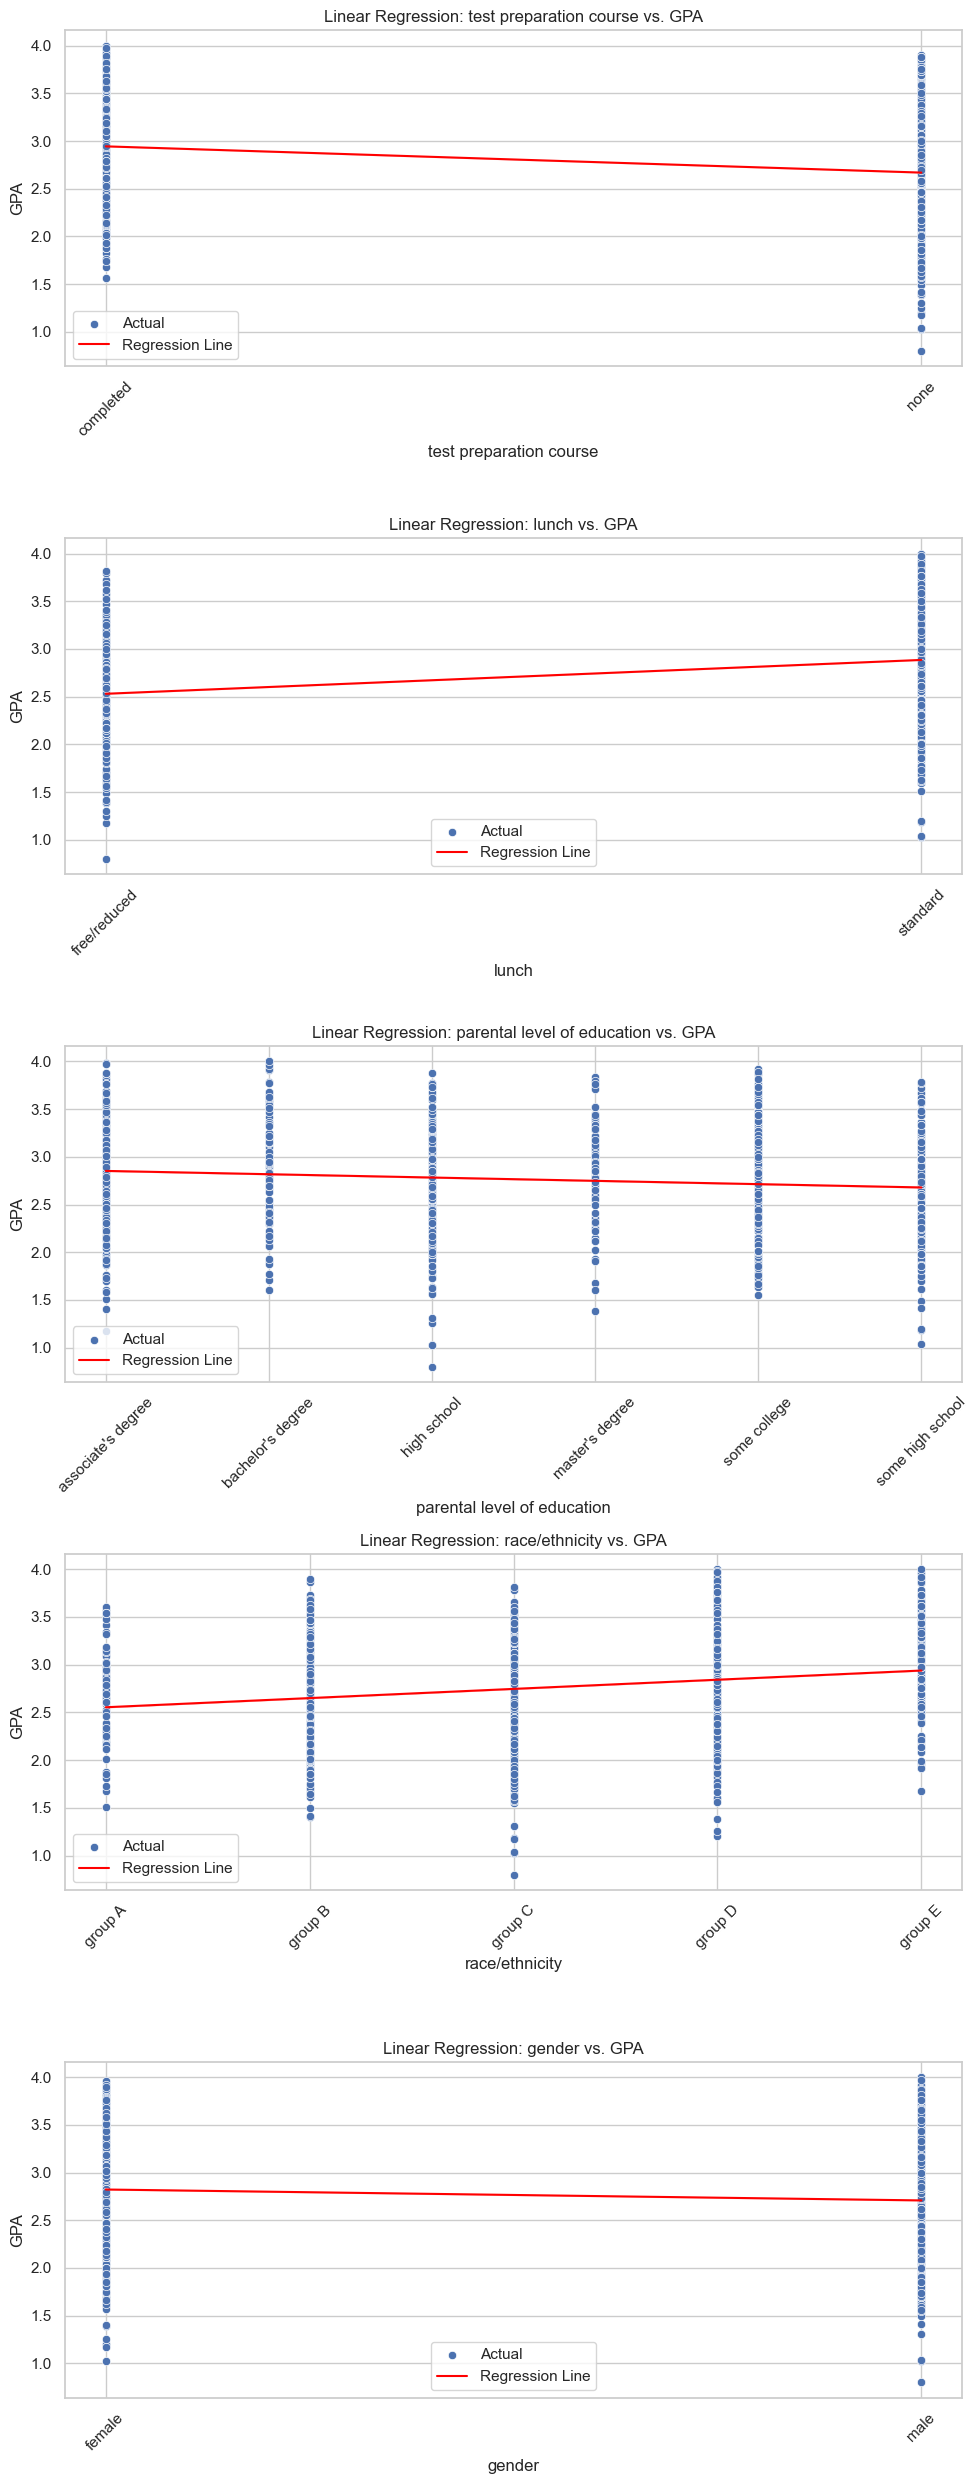

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
# Identify the GPA column and categorical columns
gpa_column = 'GPA'  # Replace with the actual GPA column name if different
categorical_columns = ['test preparation course', 'lunch', 'parental level of education', 'race/ethnicity', 'gender']

# Set up the plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, len(categorical_columns) * 5))

# Encode categorical columns and perform linear regression
for i, column in enumerate(categorical_columns):
    # Encoding the categorical variable
    le = LabelEncoder()
    X = le.fit_transform(df[column].dropna()).reshape(-1, 1)
    y = df[gpa_column].dropna()
    common_index = df[column].dropna().index.intersection(y.index)
    X = X[common_index]
    y = y.loc[common_index]
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Plotting the data points and the regression line
    sns.scatterplot(ax=axes[i], x=X.flatten(), y=y, label='Actual')
    sns.lineplot(ax=axes[i], x=X.flatten(), y=y_pred, color='red', label='Regression Line')
    axes[i].set_title(f'Linear Regression: {column} vs. {gpa_column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel(gpa_column)
    
    # Adjust x-axis ticks to show original categorical labels
    ticks = range(len(le.classes_))
    labels = le.classes_
    axes[i].set_xticks(ticks)
    axes[i].set_xticklabels(labels, rotation=45)

plt.tight_layout()
plt.show()